In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

c:\Users\Mihai\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Accessing data

In [2]:
df.iloc[0:10]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
7,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Full-time,True,Romania,2023-12-07 13:40:49,False,False,Romania,None,NaN,NaN,Zitec,"['sql', 'nosql', 'gcp', 'azure', 'aws', 'bigqu...","{'cloud': ['gcp', 'azure', 'aws', 'bigquery', ..."
8,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,NaN,NaN,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."


In [6]:
df.loc[0:10,'job_work_from_home']

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7      True
8     False
9      True
10    False
Name: job_work_from_home, dtype: bool

In [7]:
df.loc[:,'salary_rate':'salary_hour_avg'].dropna(subset = 'salary_rate')

,salary_rate,salary_year_avg,salary_hour_avg
28,year,109500.0,NaN
43,hour,NaN,97.5
51,hour,NaN,72.5
77,year,140000.0,NaN
92,year,120000.0,NaN
...,...,...,...
785624,year,139216.0,NaN
785641,year,150000.0,NaN
785648,year,221875.0,NaN
785682,year,157500.0,NaN


In [12]:
df.loc[:,'company_name'].head()

0            Boehringer Ingelheim
1      Hewlett Packard Enterprise
2        ALPHA Augmented Services
3    Southwest Research Institute
4                 Kristina Daniel
Name: company_name, dtype: object

# Cleaning data
- fill in missing values
- remove duplicates

In [4]:
median_salary_year = df['salary_year_avg'].median()
median_salary_hour = df['salary_hour_avg'].median()

In [11]:
df_filled = df
df_filled['salary_year_avg'] = df_filled['salary_year_avg'].fillna(median_salary_year)
df_filled['salary_hour_avg'] = df_filled['salary_hour_avg'].fillna(median_salary_hour)

In [13]:
df_filled.loc[:10,['salary_year_avg','salary_hour_avg']]

,salary_year_avg,salary_hour_avg
0,115000.0,45.98
1,115000.0,45.98
2,115000.0,45.98
3,115000.0,45.98
4,115000.0,45.98
5,115000.0,45.98
6,115000.0,45.98
7,115000.0,45.98
8,115000.0,45.98
9,115000.0,45.98


In [18]:
df_unique = df_filled

df_unique.drop_duplicates() #analizeaza tot tabelul => randurile sa aibe valorile identice in toate coloanele


df_unique = df_unique.drop_duplicates(subset = ['job_title','company_name']) #stergem randurile unde valorile sunt identice doar pentru coloanele respective
print(len(df_filled))
print(len(df_unique))
print('Rows dropped: ',len(df_filled)-len(df_unique))

785741
508042
Rows dropped:  277699


# Data management

In [19]:
df.sample()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
385521,Senior Data Analyst,Senior Data Analyst,"Gothenburg, Sweden",via Trabajo.org,Full-time,False,Sweden,2023-09-04 18:22:19,False,False,Sweden,None,115000.0,45.98,Volvo Group,"['nosql', 'sql', 'python', 'r', 'sql server', ...","{'analyst_tools': ['power bi', 'ssis'], 'cloud..."


In [20]:
df.sample(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
272191,Data Analyst,Master Data Management Analyst,"Guadalajara, Jalisco, Mexico",via BeBee,Full-time,False,Mexico,2023-12-10 07:42:26,False,False,Mexico,None,115000.0,45.98,BAXTER,None,None
28720,Business Analyst,Ops Business Intelligence,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via BeBee Malaysia,Full-time,False,Malaysia,2023-06-28 13:12:17,False,False,Malaysia,None,115000.0,45.98,Shopee,"['sql', 'excel', 'sheets']","{'analyst_tools': ['excel', 'sheets'], 'progra..."
304456,Data Engineer,Data Engineer,Anywhere,via Indeed,Full-time,True,India,2023-03-13 17:20:10,True,False,India,None,115000.0,45.98,Iron Systems,"['python', 'sql', 'nosql', 'dynamodb', 'aws', ...","{'cloud': ['aws', 'redshift', 'snowflake'], 'd..."
273051,Data Scientist,Data Scientist Team Lead Arabic Is Must,Abu Dhabi - United Arab Emirates,via BeBee,Full-time,False,United Arab Emirates,2023-08-18 07:33:03,False,False,United Arab Emirates,None,115000.0,45.98,Reach Employment Services,"['python', 'r', 'sql']","{'programming': ['python', 'r', 'sql']}"
610358,Data Analyst,SQL Data Analyst,"Carrollton, TX",via Trabajo.org,Full-time,False,"Texas, United States",2023-01-29 12:01:30,False,False,United States,None,115000.0,45.98,Rasa Floors,"['sql', 'excel', 'power bi', 'tableau', 'looker']","{'analyst_tools': ['excel', 'power bi', 'table..."
628344,Data Scientist,Sr Data Scientist,"Jacksonville, FL",via BeBee,Full-time,False,Georgia,2023-01-01 13:17:37,False,False,United States,None,115000.0,45.98,GuideWell,"['r', 'python', 'sql', 'hadoop']","{'libraries': ['hadoop'], 'programming': ['r',..."
366911,Data Engineer,Data Engineer f/m/d,"Graz, Austria",via Recruit.net,Full-time,False,Austria,2023-07-09 23:57:53,False,False,Austria,None,115000.0,45.98,AVL,"['python', 'bash', 'r', 'scala', 'matlab', 'az...","{'cloud': ['azure', 'aws', 'gcp'], 'libraries'..."
337961,Data Scientist,Data Scientist Lead - Customer Segmentation,"Plano, TX",via EVOKE,Full-time,False,Sudan,2023-03-14 23:53:37,False,True,Sudan,None,115000.0,45.98,"JPMorgan Chase Bank, N.A.","['sql', 'python', 'hadoop', 'spark']","{'libraries': ['hadoop', 'spark'], 'programmin..."
73484,Business Analyst,"Business Intelligence Engineer, eero Finance","São Paulo, State of São Paulo, Brazil",via Catho,Full-time,False,Brazil,2023-04-06 00:25:31,False,False,Brazil,None,115000.0,45.98,AMAZON,"['sql', 'looker', 'tableau', 'microstrategy']","{'analyst_tools': ['looker', 'tableau', 'micro..."
554814,Software Engineer,Etl & Sas Developer,Austria,via Jobs Trabajo.org,Full-time,False,Austria,2023-11-11 19:16:31,False,False,Austria,None,115000.0,45.98,Hitech Group Australia Limited,"['sas', 'sas', 'go']","{'analyst_tools': ['sas'], 'programming': ['sa..."


In [23]:
df.sample(5,random_state = 40)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
650315,Senior Data Engineer,Sr. Big Data Engineer,"Atlanta, GA",via LinkedIn,Full-time,False,Georgia,2023-02-03 11:05:29,False,False,United States,None,115000.0,45.98,Norfolk Southern Corporation,"['sql', 'scala', 'python', 'nosql', 'shell', '...","{'cloud': ['aws', 'gcp'], 'databases': ['cassa..."
28072,Data Scientist,Data Scientist,Argentina,via LinkedIn,Full-time,False,Argentina,2023-09-25 13:48:48,False,False,Argentina,None,115000.0,45.98,Banco Galicia,"['sql', 'r', 'python']","{'programming': ['sql', 'r', 'python']}"
86657,Data Scientist,Consultant(e) Data Science,"Paris, France",via Recruit.net,Full-time,False,France,2023-03-19 00:25:53,False,False,France,None,115000.0,45.98,Sia Partners,"['r', 'sas', 'sas', 'python', 'perl', 'bash', ...","{'analyst_tools': ['sas'], 'programming': ['r'..."
678850,Data Analyst,Enterprise Data Operations Analyst,"Peeramcheru, Telangana, India",via LinkedIn,Full-time,False,India,2023-11-02 10:13:44,False,False,India,None,115000.0,45.98,PepsiCo,"['c#', 'sql', 'sql server', 'azure', 'react', ...","{'cloud': ['azure'], 'databases': ['sql server..."
154301,Data Analyst,Produktionsplaner / Data Analyst (m|w|d),"Bopfingen, Germany",via BeBee,Full-time,False,Germany,2023-11-11 08:15:32,True,False,Germany,None,115000.0,45.98,Voith SE & Co. KG,"['sql', 'vba', 'python', 'javascript', 'sap', ...","{'analyst_tools': ['sap', 'ms access'], 'progr..."


In [24]:
df.sample(5,random_state = 40)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
650315,Senior Data Engineer,Sr. Big Data Engineer,"Atlanta, GA",via LinkedIn,Full-time,False,Georgia,2023-02-03 11:05:29,False,False,United States,None,115000.0,45.98,Norfolk Southern Corporation,"['sql', 'scala', 'python', 'nosql', 'shell', '...","{'cloud': ['aws', 'gcp'], 'databases': ['cassa..."
28072,Data Scientist,Data Scientist,Argentina,via LinkedIn,Full-time,False,Argentina,2023-09-25 13:48:48,False,False,Argentina,None,115000.0,45.98,Banco Galicia,"['sql', 'r', 'python']","{'programming': ['sql', 'r', 'python']}"
86657,Data Scientist,Consultant(e) Data Science,"Paris, France",via Recruit.net,Full-time,False,France,2023-03-19 00:25:53,False,False,France,None,115000.0,45.98,Sia Partners,"['r', 'sas', 'sas', 'python', 'perl', 'bash', ...","{'analyst_tools': ['sas'], 'programming': ['r'..."
678850,Data Analyst,Enterprise Data Operations Analyst,"Peeramcheru, Telangana, India",via LinkedIn,Full-time,False,India,2023-11-02 10:13:44,False,False,India,None,115000.0,45.98,PepsiCo,"['c#', 'sql', 'sql server', 'azure', 'react', ...","{'cloud': ['azure'], 'databases': ['sql server..."
154301,Data Analyst,Produktionsplaner / Data Analyst (m|w|d),"Bopfingen, Germany",via BeBee,Full-time,False,Germany,2023-11-11 08:15:32,True,False,Germany,None,115000.0,45.98,Voith SE & Co. KG,"['sql', 'vba', 'python', 'javascript', 'sap', ...","{'analyst_tools': ['sap', 'ms access'], 'progr..."


### Copy

In [27]:
df.head() #cand am modificat mai sus valorile prin df_flled mi s-au modificat si in original
# df_filled pointa catre df original, deci avea acces la valori, deci modificarile s-au aplicat si pe original

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,115000.0,45.98,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,115000.0,45.98,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,115000.0,45.98,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,115000.0,45.98,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,115000.0,45.98,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [28]:
id(df_filled) == id(df)

True

In [29]:
df_copy = df.copy()

print('ID copy: ',id(df_copy))
print('ID original: ',id(df))
print('Are the 2 the same?  ->  ',id(df_copy) == id(df))

ID copy:  2417806474000
ID original:  2417222313424
Are the 2 the same?  ->   False


# Pivot table

In [60]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

In [61]:
df.pivot_table(index = 'job_title_short', aggfunc='size')

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [62]:
df.pivot_table(index = 'job_title_short',values = 'salary_year_avg', aggfunc='median')

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


In [63]:
df.pivot_table(index = 'job_country', columns = 'job_title_short', values = 'salary_year_avg', aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [83]:
top_countries = df['job_country'].value_counts().head(6).index
top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

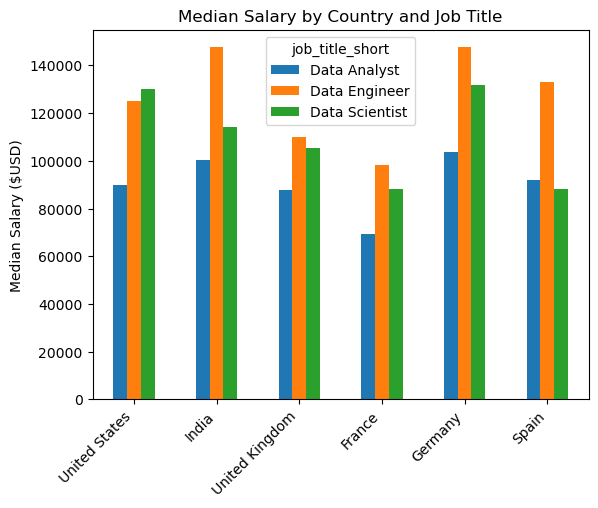

In [85]:
df_job_country_salary = df.pivot_table(
    index = 'job_country',
    columns = 'job_title_short',
    values = 'salary_year_avg',
    aggfunc = 'median'
)
df_job_country_salary = df_job_country_salary.loc[top_countries] #index = valorile din job_country
df_job_country_salary

job_titles = ['Data Analyst','Data Engineer', 'Data Scientist']
df_job_country_salary = df_job_country_salary.loc[:,job_titles] #coloane = valorile din job_title_short
#df_job_country_salary

df_job_country_salary.plot(kind = 'bar')
plt.ylabel('Median Salary ($USD)')
plt.xlabel('')
plt.title('Median Salary by Country and Job Title')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [76]:
df.loc[:,['company_name','salary_year_avg']].head()

,company_name,salary_year_avg
0,Boehringer Ingelheim,NaN
1,Hewlett Packard Enterprise,NaN
2,ALPHA Augmented Services,NaN
3,Southwest Research Institute,NaN
4,Kristina Daniel,NaN


# Index Management

In [86]:
df.index

RangeIndex(start=0, stop=785741, step=1)

In [90]:
df.index.name = 'job_index' #name este atribut al clasei
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [91]:
df.index.dtype

dtype('int64')

### Methods
- df.reset_index()
- df.set_index()
- df.sort_index()

In [93]:
df_usa = df[df['job_country'] == 'United States']
df_usa #indexul are valori lipsa, sare de la 0 la 3 la 5 etc => utilizam reset_index

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"


In [95]:
df_usa.reset_index(inplace=True)
df_usa.head()

,index,job_index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,0,0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,1,3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
2,2,5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
3,3,6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
4,4,9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."


In [97]:
df_usa.set_index('job_index', inplace = True)
df_usa

,index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,,
0,0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,1,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,2,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,3,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,4,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,206287,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,206288,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785692,206289,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"
